## Examen Parcial

#### Estudiante: Roxana Jimena Rodriguez Pilco - 20200373

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### 1. (2 puntos) Defina el Multiplicador Keynesiano y dé un ejemplo de cómo influye este en el modelo Ingreso-Gasto Keynesiano.

- Concepto:

Ante un cambio en la magnitud de cualquier componente autónomo de la demanda agregada ($DA$), los cuales conforman el intercepto de su ecuación, va a producir un proceso multiplicador del ingreso hasta converger al nuevo ingreso y producto de equilibrio ($Y$). Así, este aumento multiplicado del ingreso ($Y$) resulta de los efectos directos e indirectos ocasionados por el aumento de los componentes autónomos de la demanda agregada ($DA$)

En una ecuación, el multiplicador resulta $$ k = \frac{1}{1 - (b - m)(1 - t)}$$

Por tanto, el tamaño del multiplicador keynesiano depende de la magnitud de los parámetros $b$, $m$ y $t$.
Las filtraciones de demanda son las que reducen su tamano, estas se presentan en la propension marginal a ahorrar o la propensión marginal a consumir $b$, la propensión marginal a importar $m$ y la tasa promedio de impuestos o tasa impositiva$t$.

- Ejemplo: Cambios en la propensión marginal a importar $m$, específicamente su reducción

Los aumentos de $m$ tienen efectos contractivos y sus reducciones tienen efectos expansivos sobre el producto $Y$. Por tanto, si aumenta $m$ se reduce el multiplicador keynesiano y a la vez se reduce la demanda agregada $DA$, lo que significa que ahora la demanda agregada es menor que el producto $DA<Y$, por ende el ingreso de equilibrio $Y$ debe reducirse. Por tanto, cuando aumenta la propension marginal a importar se reduce el valor del multiplicador y la pendiente de la funcion de $DA$, girando la recta de la $DA$ en el sentido de las agujas del reloj. 

### 2. (2 puntos) Grafique y explique cúando sucede un exceso y déficit de demanda en el modelo Ingreso-Gasto. Señale las áreas donde ocurre cada caso. Explique cómo se converge al equilibrio a partir de estos dos escenarios.

In [4]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

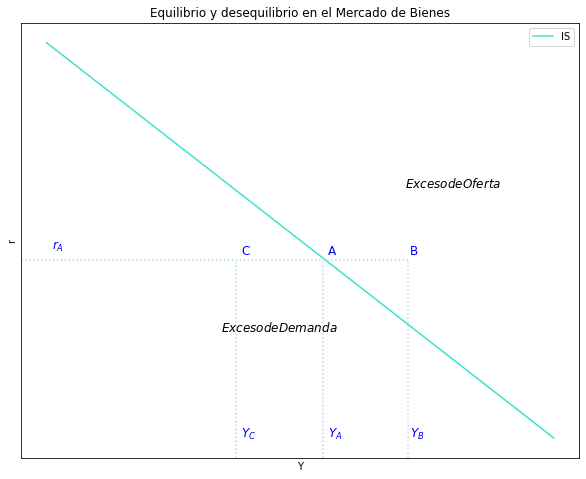

In [5]:
# Gráfico: Curva IS
# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.plot(Y, r, label = "IS", color = "#40e0d0") 

#Líneas punteadas
ax.axvline(x = 70.5, ymin= 0, ymax = 0.45, linestyle = ":", color = "#add8e6")
ax.axvline(x = 54,  ymin= 0, ymax = 0.45, linestyle = ":", color = "#add8e6")
ax.axvline(x = 37,  ymin= 0, ymax = 0.45, linestyle = ":", color = "#add8e6")
plt.axhline(y = 165, xmin= 0, xmax = 0.693, linestyle = ":", color = "#add8e6")

#Títulos, ejes y leyenda
ax.text(71, 128, '$Y_B$', fontsize = 12, color = 'blue')
ax.text(55, 128, '$Y_A$', fontsize = 12, color = 'blue')
ax.text(38, 128, '$Y_C$', fontsize = 12, color = 'blue')
ax.text(1, 167, '$r_A$', fontsize = 12, color = 'blue')
ax.text(71, 166, 'B', fontsize = 12, color = 'blue')
ax.text(55, 166, 'A', fontsize = 12, color = 'blue')
ax.text(38, 166, 'C', fontsize = 12, color = 'blue')
#Coordenadas de excesos
ax.text(70, 180, '$Exceso de Oferta$', fontsize = 12, color = 'black')
ax.text(34, 150, '$Exceso de Demanda$', fontsize = 12, color = 'black')

ax.set(title = "Equilibrio y desequilibrio en el Mercado de Bienes", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

Cómo observamos en el gráfico, los puntos que conforman la curva  𝐼𝑆  representan el conjunto de pares ordenados  (𝑌,𝑟)  y este conjunto de valores ordenados equilibran el mercado de bienes. Sin embargo, observamos que en el gráfico también hay puntos que están fuera de los puntos de equilibrio del mercado de bienes, estos son puntos de desequilibrio de mercado. Este desequilibrio se puede producir por 2 factores: un exceso de oferta (puntos ubicados a la derecha de la curva IS) o un exceso de demanda (puntos ubicados a la izquierda de la curva IS). Por ejemplo, el punto A es de equilibrio y se encuentra dentro de la curva IS, este punto denota que el par ordenado ( 𝑌𝐴,𝑟𝐴 ) equilibra el ahorro con la inversión ( 𝐼𝐴=𝑆𝐴 ).

Pero, el punto B, que se encuentra a la derecha de la curva IS y corresponde al par ordenado ( 𝑌𝐵,𝑟𝐴 ) muestra que como la tasa de interés se mantiene, entonces la inversión también se mantiene igual, pero el ahorro ha aumentado en comparación con el que corresponde al punto A, esto debido a que el ingreso aumentó y ahora es mayor que el ingreso correspondiente al punto A ( 𝑌𝐴 ), en suma, en el punto B, el ahorro del punto B es mayor que la inversión en el punto A( 𝐼𝐴<𝑆𝐵 ), por ende, a la derecha de la curva IS se observa un desequilibrio producido por un exceso de oferta. Asimismo, el punto C corresponde a los valores ordenados ( 𝑌𝐶,𝑟𝐴 ) y representa que si bien la tasa de interés se mantiene y consecuentemente la inversión también lo hace, el ahorro ha disminuido en comparación con el ahorro correspondiente al punto A ( 𝑌𝐴 ) debido a que el ingreso ha disminuido, en suma, en el punto C, el ahorro en el punto C es menor a la inversión en el punto A ( 𝐼𝐴>𝑆𝐶 ), por consiguiente, a la izquierda de la curva IS se observa un desequilibrio producido por un exceso de demanda.

Por ejemplo: El incremento de cualquier gasto autónomo, aumenta la demanda agregada de bienes generando así un exceso de demanda que da lugar a un desplazamiento de la curva IS hacia la derecha, donde, como se ha mostrado anteriormente, hay exceso de oferta

### 3. (2 puntos) ¿Cuáles son las herramientas de política fiscal y política monetaria? Dea un ejemplo para cada una de ellas dentro del contexto peruano. Coloque su fuente en caso sea necesario. (Solo necesita 1 para pol. Fiscal y 1 para Monetaria).

###### Instrumentos de política monetaria
El BCRP es la autoridad monetaria central del sistema bancario. Este tiene la capacidad de gestionar la oferta monetaria al aplicar políticas monetarias expansivas y contractivas por medio de 3 posibles instrumentos: Operación de mercado abierto, el coeficiente legal de encaje y la tasa de interés.

En primer lugar, el Banco Central usa como instrumento a la Operación de Mercado Abierto para aumentar o disminuir la oferta monetaria. Con operaciones de mercado abierto se hace referencia a las operaciones de compra y venta de activos financieros o bonos a los bancos comerciales. Por medio de este instrumento el BCRP realiza políticas expansivas cuando compra bonos del mercado, pues inyecta dinero (liquidez) en la economía, lo que contribuirá al aumento de la oferta monetaria. También realiza políticas contractivas por medio de la venta de bonos al mercado, pues al hacerlo retira dinero de la economía, lo que deriva en la reducción de la oferta monetaria.

En segundo lugar, el BCRP usa el coeficiente legal de encaje para realizar políticas expansivas y contractivas y controlar la oferta monetaria: Por un lado, al reducir la tasa de encaje permite que los bancos dispongan de más dinero para realizar préstamos porque aumenta el multiplicador bancario y este aumento del dinero bancario significa un aumento de la oferta monetaria (política expansiva). Por otro lado, el BCRP puede aumentar el coeficiente legal de encaje, haciendo que los bancos comerciales deban tener una mayor proporción de depósitos en forma de reservas, lo que significaría la reducción del
multiplicador bancario y en consecuencia una disminución de la oferta monetaria (política contractiva).

En tercer lugar, el Banco Central viene utilizando la tasa de interés como una herramienta para hacer políticas expansivas y contractivas en el mercado monetario desde 1990, cuando cambió su esquema de política monetaria. Para este caso, se comprende a la oferta monetaria como una variable endógena a diferencia de los 2 casos anteriores. De modo que, por un lado, el BCRP hace política monetaria expansiva al reducir su tasa de interés de referencia, lo que aumenta la cantidad de dinero prestada a los bancos comerciales y la base monetaria, generando con ello el aumento de la oferta monetaria. Por otro lado, este hace política monetaria contractiva cuando aumenta su tasa de interés de referencia, pues con ello disminuye la cantidad de dinero prestada a los bancos comerciales al igual que la base monetaria, generando en consecuencia la disminución de la oferta monetaria.

- Ejemplo de política monetaria

En junio del 2021, el Directorio del Banco Central de Reserva del Perú tomó una decisión importante sobre la tasa de interés de referencia. Este acordó mantener la tasa de interés de referencia en 0,25 por ciento, junto a operaciones de inyección de liquidez. Es decir, decidió continuar con su política monetaria expansiva mientras persistieran los efectos negativos de la pandemia sobre la inflación y sus determinantes.
Fuente: https://www.bcrp.gob.pe/docs/Transparencia/Notas-Informativas/2021/nota-informativa-2021-06-10-1.pdf


###### Instrumentos de política fiscal
Los instrumentos de política fiscal son la tasa impositiva $t$ y el gasto de gobierno $G$ (al igual que las transferencias, $TR$, que se ha supuesto igual a cero, por simplicidad), estos elementos son variables exógenas e instrumentos de política fiscal en el modelo ingreso-gasto. El gobierno puede estabilizar o contener las fluctuaciones del producto $Y$ mediante la política fiscal utilizando $G$, $t$ y/o $TR$. Por un lado, la función de impuestos $𝑇 = 𝑡𝑌$, donde $t$ es la tasa de impuestos que el gobierno puede utilizar como instrumento de política fiscal, puede actuar como un estabilizador automático de las fluctuaciones del producto. La tributación varía con el nivel del producto, controlando sus fluctuaciones. En los periodos de auge la tributación aumenta, consecuentemente el déficit se reduce o aumenta el superávit fiscal, con lo cual se reduce la demanda agregada ($DA$) y el nivel de producción ($Y$) 
Así, el gobierno influye en la demanda agregada mediante la fijación de la tasa de impuestos, pues como se mencionó, si esta aumenta, se reduce el ingreso disponible y, en consecuencia, el gasto en consumo de las familias, disminuyendo, la demanda agregada e impactando de manera negativa en el nivel de producción (Y).

Por otro lado, el gasto del Gobierno incluye las compras del Estado (remuneraciones de funcionarios y pago por la compra de bienes y servicios)y cuando se busca una expansión del ingreso y, en consecuencia, del producto $Y$, el gasto de gobierno $G$ aumenta, y viceversa.

- Ejemplo de política fiscal
 
Por ejemplo, en el contexto de la crisis sanitaria, el Perú elevó el gasto público para realizar el otorgamiento de bonos extraordinarios y transitorios que sirvieran para sostener los ingresos de las familias pertenecientes a los tramos de ingresos más bajos. Se anunció la entrega del bono “Yo me quedo en casa” dirigido a los hogares en condición de pobreza y pobreza extrema (100 dólares), el bono a los trabajadores independientes (100 dólares), el bono para hogares del ámbito rural (200 dólares) y, por último, el bono familiar universal (200 dólares), con lo que se buscó asistir a más de 6.8 millones de hogares peruanos.
 
MEF. (2020). Medidas para mitigar la emergencia. Recuperado de: https://www.mef.gob.pe/planeconomicocovid19/soportehogares.html


### 4. (2) Explique qué funciones del dinero respaldan el éxito de de Yape y Plin(Aplicativos moviles para intercambio de dinero).

El dinero, si lo consideramos como un bien, es un activo financiero líquido, el cual tiene sus respectivas funciones, entre ellas el ser un medio de cambio, una reserva de valor, una unidad de cuenta y patrón de precios y un medio de pago. Por tanto, si hablamos de Yape y Plin, estos son aplicativos móviles muy usados actualmente porque permiten realizas transacciones monetarias fácilmente y te evitan la molestia de cargar dinero en efectivo. 

De modo que, las funciones que respaldan a Yape y Plin son:

- Función de medio de intercambio
Porque, por medio de estos aplitivos móviles se puede pagar por bienes como zapatillas y ropa y servicios y a cambio obtenerlos, pues estos están habilitados como medios de pago en las diversas tiendas y supermercados.


- Función de medio de Pago:
Porque, mediante los aplicativos se pueden cancelar deudas o nuestros servicios, por ejemplo, por medio de Yape puedo realizar transacciones de pago a otras personas que me prestaron dinero o pagar deudas de servicios.


- Función de reserva de Valor
Porque, en los aplicativos puedes mantener tu dinero (riqueza) hasta que decidas utilizarlo, es como una billetera electrónica.


### 5. (3 puntos) Cuáles son las conclusiones principales del paper de Dancurt "Inflation Targeting in Peru: The Reasons for the Success"

El artículo de Oscar Dancourt estudia la manera en que los principales instrumentos de la política monetaria peruana (la tasa de interés de referencia, el coeficiente de encaje legal en moneda nacional y extranjera y la intervención esterilizada en el mercado de divisas) fueron usados durante 2002-2013, e influenciaron la actividad económica y el nivel de precios por medio de 2 canales principales: el crédito y el tipo de cambio. 

Se concluye que, las lecciones que dejó la crisis internacional de 2008-2009 en el contexto económico peruano no deben ser olvidadas, por tanto, el BCRP debe reducir la tasa de interés de referencia y vender moneda extranjera en respuesta a choques externos adversos. También, el BCRP debe aumentar la tasa de interés y compran moneda extranjera para tener suficientes reservas de divisas en respuesta a choques externos favorables, es decir, continuar con la política monetaria que implantó desde 2002-2013, porque esta permitió que se mantenga la estabilidad macroeconómica en contextos externos tanto favorables como desfavorables.

También mencionó que para prevenir crisis bancarias es necesario que el BCRP limite el endeudamiento externo de los bancos comerciales, al imponerle requisitos de reserva más altos a la deuda externa de los bancos comerciales.

Finalmente, un punto crucia de este trabajo, es evaluar si la caida del tipo de cambio real desde 2007 resultó de el esquema monetario o se atribuye a errores en el manejo de la política monetaria. Dancourt planteó que la caída de 2007 se debía a que fue un error el reducir la meta de inflación y ante esto planteo la solución de que una regla de intervención cambiaria simétrica

Este trabajo ha planteado que esta caída está ligada al error de reducir la meta de inflación en 2007, y que una regla de intervención cambiaria simétrica permitiría evitar estas caídas del tipo de cambio real mientras al mismo tiempo se cumple con la meta de inflación, como se pudo demostrar en 2002-06. Por tanto, la política planteada por Blanchard (2010) que combina una regla de Taylor para manejar la tasa d einterés y una regla de intervención del tipo de cambio que se apoya contra el viento estabilizaría los niveles de precios y la actividad económica sin limitar la diversificación productiva a largo plazo.

## PARTE PRÁCTICA

### Ejercicio 1 (6 puntos). El modelo ingreso-gasto en una economía abierta

### 1. (2 puntos) Encuentre el Ingreso de Equilibrio  e identifique el multiplicador keynesiano.

Haciendo reemplazos y algunas operaciones en la ecuación de la demanda agregada, se obtiene:

$$ DA = C_0 + b(1-t)Y + I_0 - hr + G_0 + x_1Y* + x_2ε− m_1(1 − t)Y + m_2ε $$

$$ DA = C_0 + I_0 +G_0 + [b(1 − t)− m_1(1 −t)]Y − hr + x_1Y∗ + (x_2 + m_2)ε $$

$$ DA = w −hr + x_1Y∗ + (x_2 + m_2)ε_0 − (x_2 + m_2)ρr + (x_2 + m_2)ρr∗ + [(b− m_1) (1− t)]Y $$

Donde 
$$ w = C_0 + I_0 + G_0 $$
   
$$ DA = [𝑤 + x_1Y∗ + (x_2 + m_2)ε_0 + (x_2 + m_2)ρr∗ − (h + (x_2 + m_2)ρ)r] +[(b− m_1)(1− t)]Y $$

$$ DA = a0+a1Y$$
La magnitud del intercepto depende en este caso de otras variables exógenas como la tasa de interés del resto del mundo y el tipo de cambio real de equilibrio. Para obtener el ingreso de Equilibrio tenemos que igualar Y = DA

$$ Y = \frac{1}{1-(b-m_1)(1− t)} [w + (x_2 + m_2)ε_0 + (x_2 + m_2)ρr∗ + x_1Y∗] - [\frac{h+(x_2 + m_2)ρ)}{1-(b-m_1)(1− t)}]r $$


Siendo el multiplicador: 

$$ \frac{1}{1-(b-m_1)(1− t)} $$

### 2. (2 puntos) Analice los efectos sobre la variable endógena  de una disminución del gasto fiscal . El análisis debe ser intuitivo, matemático y gráfico.

In [ ]:
Intuitivo:
    $$ Go↓  →  w↓  →  DA↓  →  DA < Y  →  Y↓ $$
    
    Si disminuye el gasto fiscal, entonces disminuye el gasto autónomo, lo que significa que w disminuye, por ende, la demanda agregada disminuye, entonces la demanda agregada seria menor al nivel de producto, por ende, el nivel de 

Matemático
ΔY=(-)


### Ejercicio 2 (5 puntos). Modelo de OA-DA y el nuevo esquema institucional de Política Monetaria, donde la tasa de interés de referencia  es usada como instrumento.

### 1. (2 puntos) Encuentre las ecuaciones de equilibrio de , 

- DA:

$ IS: [1-b(1-t)]Y = C_0 + I_0 + G_0 - hr_0 $

$ LM: M^s_0 - P = kY - jr_0 $
           
- Oferta Agregada:

$ P = P^e + θ(Y- Y') $

$ IS: [1-b(1-t)]Y = C_0 + I_0 + G_0 - hr_0 $

Considernado, por un lado, la Curva IS:

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

Donde $ B_0 = C_o + I_o + G_o $ y $ B_1 = 1 - b (1 - t)$

Considerando la ecuación LM:
$$ r = \frac{k}{j}Y - \frac{M^s_0 - P}{j} $$